# G2M insight for Cab Investment firm

## G2M Case Study 

##  <font color = #27C3E5> import required Library

In [1]:
import datetime
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

## <font color = #41EA46> Read the Dataset

In [2]:
Cab_Data = pd.read_csv('Datasets/Cab_Data.csv')
Customer_ID =  pd.read_csv('Datasets/Customer_ID.csv')
Transaction_ID = pd.read_csv("Datasets/Transaction_ID.csv")
City = pd.read_csv("Datasets/City.csv")

In [3]:
Cab_Data.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [4]:
Cab_Data.tail()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480
359391,10440107,43102,Yellow Cab,WASHINGTON DC,12.76,191.58,177.6192


In [5]:
Transaction_ID.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [6]:
Transaction_ID.tail()

,Transaction ID,Customer ID,Payment_Mode
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card
440097,10440108,51587,Card


In [7]:
Customer_ID.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [8]:
Customer_ID.tail()

,Customer ID,Gender,Age,Income (USD/Month)
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454
49170,39761,Female,32,10128


In [9]:
City.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [10]:
# Check the shape of whole dataset
print("shape of Cab_Data", Cab_Data.shape)
print("shape of Customer_ID", Customer_ID.shape)
print("shape of Transaction_ID", Transaction_ID.shape)
print("shape of City Data", City.shape)

shape of Cab_Data (359392, 7)
shape of Customer_ID (49171, 4)
shape of Transaction_ID (440098, 3)
shape of City Data (20, 3)


In [11]:
# check the basic information 
print(Cab_Data.info())
print(Customer_ID.info())
print(Transaction_ID.info())
print(City.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int6

## <font color = #41EA6> Data Cleaning & Visualization

In [12]:
for col in Cab_Data.columns:
    if ' ' in col:
        Cab_Data = Cab_Data.rename(columns={col:col.replace(' ','_')})

In [13]:
Cab_Data.columns

Index(['Transaction_ID', 'Date_of_Travel', 'Company', 'City', 'KM_Travelled',
       'Price_Charged', 'Cost_of_Trip'],
      dtype='object')

In [14]:
for col in Transaction_ID.columns:
    if ' ' in col:
        Transaction_ID = Transaction_ID.rename(columns={col:col.replace(' ','_')})

In [15]:
Transaction_ID.columns

Index(['Transaction_ID', 'Customer_ID', 'Payment_Mode'], dtype='object')

In [16]:
for col in Customer_ID.columns:
    if ' ' in col:
        Customer_ID = Customer_ID.rename(columns={col:col.replace(' ','_')})

In [17]:
Customer_ID.columns

Index(['Customer_ID', 'Gender', 'Age', 'Income_(USD/Month)'], dtype='object')

In [18]:
Cab_Data.head(2)

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854


In [19]:
from datetime import datetime, timedelta
def to_date_format(n):
    date_str =(datetime(1899,12,30) + timedelta(n-1)).strftime("%d-%m-%Y")
    date_date =  datetime.strptime(date_str, "%d-%m-%Y")
    return date_date

In [20]:
Cab_Data['Date_of_Travel'] = Cab_Data['Date_of_Travel'].apply(lambda x:to_date_format(x))

In [21]:
Cab_Data.head(2)

,Transaction_ID,Date_of_Travel,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip
0,10000011,2016-01-07,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,2016-01-05,Pink Cab,ATLANTA GA,28.62,358.52,334.854


In [22]:
months=[]
years =[]
for i in range(len(Cab_Data['Date_of_Travel'])):
    months.append(Cab_Data['Date_of_Travel'][i].month)
    years.append(Cab_Data['Date_of_Travel'][i].year)
Cab_Data['Month'] = months
Cab_Data['Year'] = years

Cab_Data.drop('Date_of_Travel', axis=1, inplace=True)

In [23]:
# before doing EDA, let's split the dataset into Pink Cab and Yellow Cab
PinkCab = Cab_Data[Cab_Data['Company']=='Pink Cab']
YellowCab = Cab_Data[Cab_Data['Company']=='Yellow Cab']

In [24]:
Cab_Data.head()

,Transaction_ID,Company,City,KM_Travelled,Price_Charged,Cost_of_Trip,Month,Year
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,1,2016
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854,1,2016
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.632,1,2016
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.602,1,2016
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.776,1,2016


In [25]:
plot0 = Cab_Data[Cab_Data.Company=='Pink Cab'].groupby(['Month']).Transaction_ID.count()
plot0

Month
1      4825
2      3392
3      4228
4      4140
5      5023
6      5820
7      6585
8      8061
9      9647
10    10366
11    11324
12    11300
Name: Transaction_ID, dtype: int64

**Monthly Transaction Analysis**

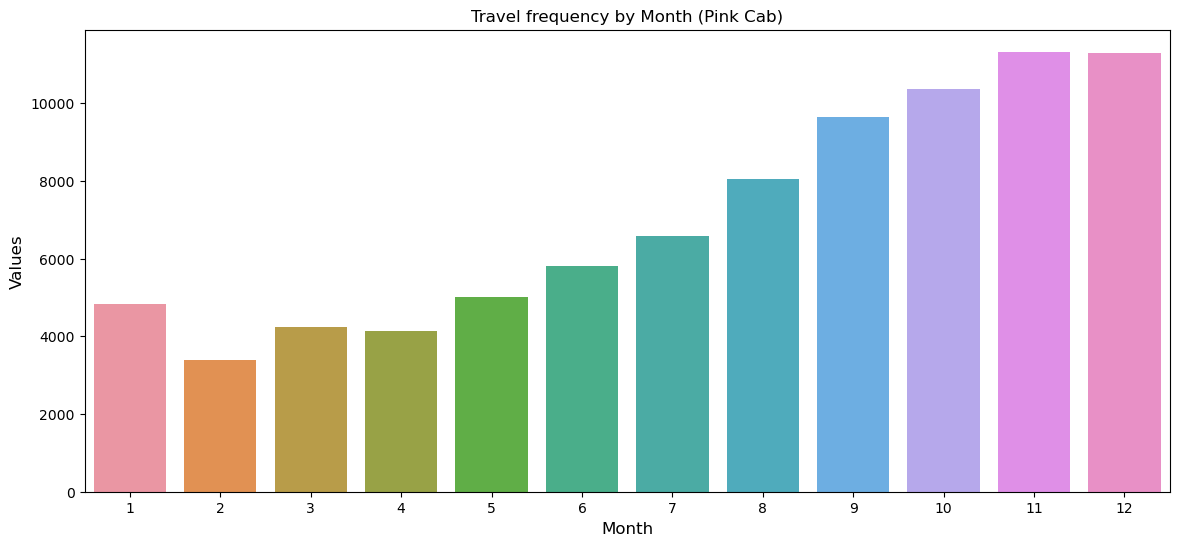

In [26]:
plt.figure(figsize=(14,6))
sns.barplot(x=plot0.index,y=plot0.values)
plt.title('Travel frequency by Month (Pink Cab)',fontsize = 12)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Values',fontsize = 12)
plt.show()

In [27]:
plot1 = Cab_Data[Cab_Data.Company=='Yellow Cab'].groupby(['Month']).Transaction_ID.count()
plot1

Month
1     17468
2     14928
3     17516
4     17535
5     18809
6     18656
7     21074
8     24328
9     27356
10    29609
11    32609
12    34793
Name: Transaction_ID, dtype: int64

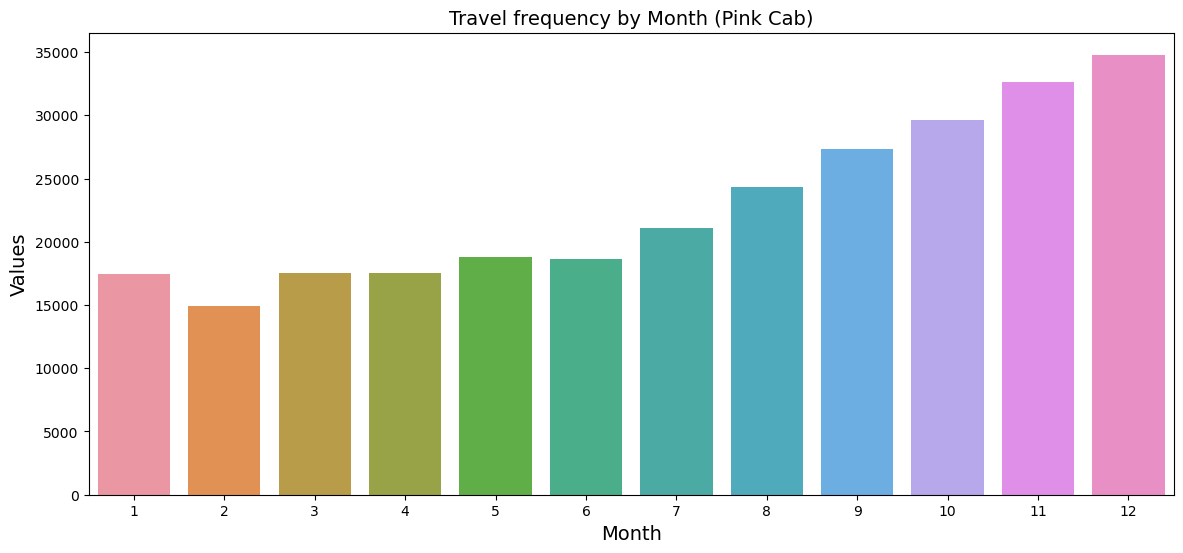

In [28]:
plt.figure(figsize=(14,6))
sns.barplot(x=plot1.index,y=plot1.values)
plt.title('Travel frequency by Month (Pink Cab)',fontsize = 14)
plt.xlabel('Month', fontsize = 14)
plt.ylabel('Values',fontsize = 14)
plt.show()

>**Yellow Cab has higher travels in all month, with december having highest difference, also Februrary for both being lowest, the rate of change is smoother in yellow**

In [29]:
overall_distance = Cab_Data['KM_Travelled'].describe()
PinkCab_distance = PinkCab['KM_Travelled'].describe()
YellowCab_distance = YellowCab['KM_Travelled'].describe()

In [30]:
df = pd.DataFrame({'Overall': overall_distance.values,
                  'PinkCab': PinkCab_distance.values,
                  'YellowCab': YellowCab_distance.values}, index= ['Count', 'Mean', 'Std. Dev.', 'Min', '25%', '50%', '75%', 'Max'])
df

,Overall,PinkCab,YellowCab
Count,359392.000000,84711.000000,274681.000000
Mean,22.567254,22.559917,22.569517
Std. Dev.,12.233526,12.231092,12.234298
Min,1.900000,1.900000,1.900000
25%,12.000000,12.000000,11.990000
50%,22.440000,22.440000,22.440000
75%,32.960000,32.960000,32.960000
Max,48.000000,48.000000,48.000000


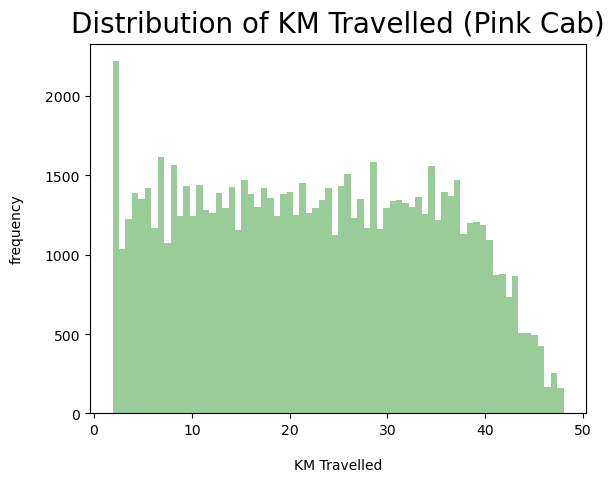

In [31]:
ax = sns.distplot(PinkCab['KM_Travelled'], kde=False, color='green', bins=70)
plt.title("Distribution of KM Travelled (Pink Cab)", fontsize=20, y=1.012)
plt.xlabel("KM Travelled", labelpad=15)
plt.ylabel("frequency", labelpad=15)
plt.show()

Text(0, 0.5, 'frequency')

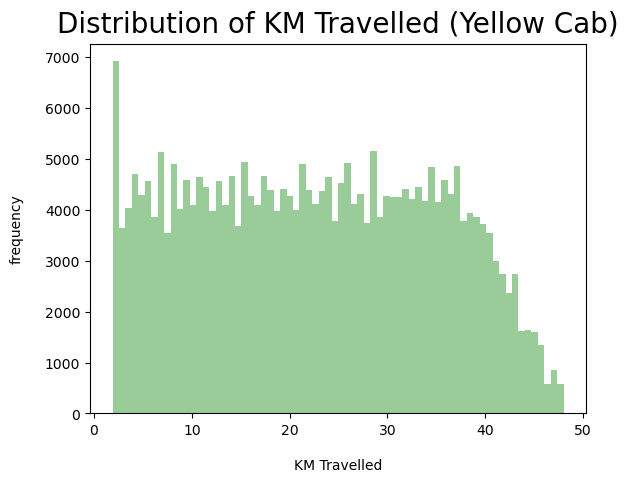

In [32]:
ax = sns.distplot(YellowCab['KM_Travelled'], kde=False, color='green',bins=70)
plt.title("Distribution of KM Travelled (Yellow Cab)", fontsize=20, y=1.012)
plt.xlabel("KM Travelled", labelpad=15)
plt.ylabel("frequency", labelpad=15)

>**From the above graphs, most rides are uniform with the range of approximately 2 to APP. 46 KM.**

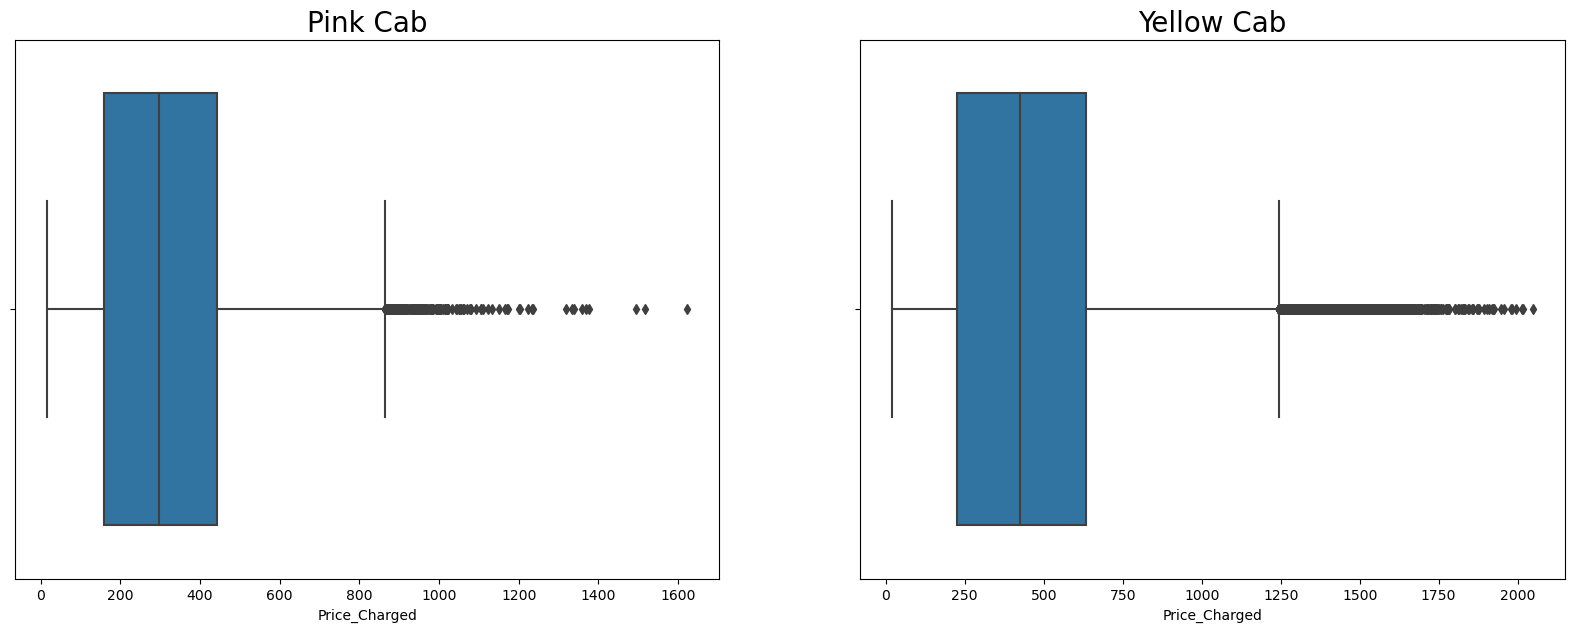

In [33]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,7))
sns.boxplot(PinkCab['Price_Charged'], ax=ax1)
ax1.set_title('Pink Cab', fontsize=20)
sns.boxplot(YellowCab['Price_Charged'], ax=ax2)
ax2.set_title('Yellow Cab', fontsize=20)
plt.show()

**Outliers**

>These outliers are due to use of high-end cars so decided to keep it.

>The price charge range for Yellow cab is more than the Pink cab.


In [34]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 7))
sns.scatterplot(PinkCab['KM_Travelled'], PinkCab['Price_Charged'], ax=ax1)
ax1.set_title('Price vs Distance in Pink Cab', fontsize=20)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0, fontsize=20 fontcolor, = "Blue)
sns.scatterplot(YellowCab['KM_Travelled'], YellowCab['Price_Charged'], ax=ax2)
ax2.set_title('Price vs Distance in Yellow Cab', fontsize=20, fontcolor = "Blue)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0, fontsize=15)
plt.show()

SyntaxError: invalid syntax (291622529.py, line 4)

In [ ]:
user=df.groupby('Company')
avg_user = user.Users.mean()
index = avg_user.index
value = avg_user.values 

figp, axp = plt.subplots(figsize=(10,7))
axp.pie(value , labels=index, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Users Travel', fontsize = 15)
plt.show()

In [ ]:
PinkCab['KM_Travelled'].corr(PinkCab['Price_Charged'])

In [ ]:
YellowCab['KM_Travelled'].corr(YellowCab['Price_Charged'])

>*The Average price charge for yellow cab is higher *

>*As Assumption needs to be established that Outliers will not influence the result, we can see it is almost the same. *

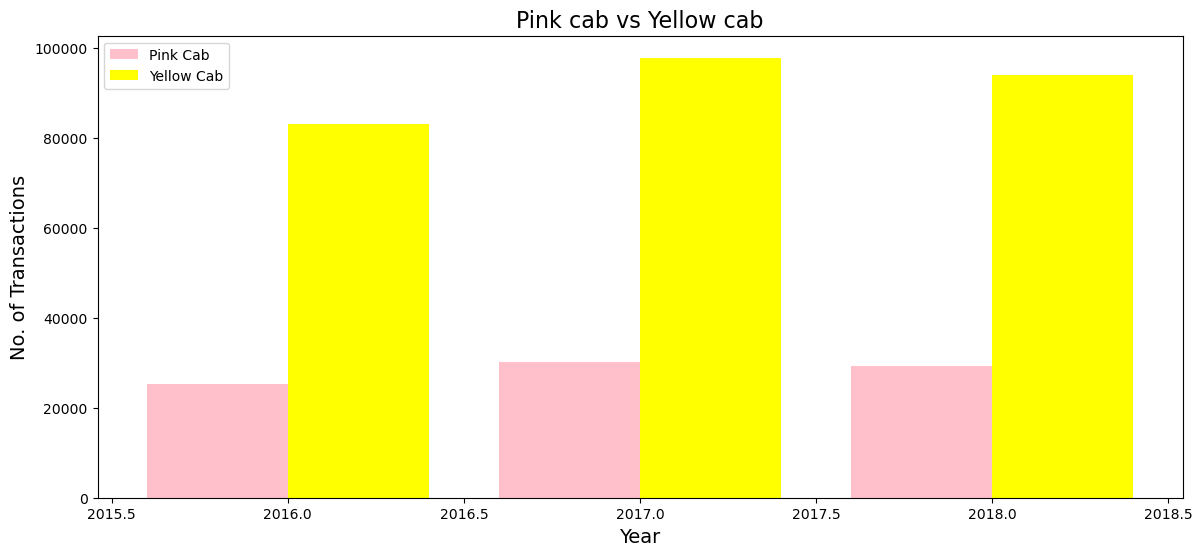

In [35]:
plot1 = Cab_Data[Cab_Data.Company=='Pink Cab'].groupby('Year').Transaction_ID.count()
plot2 = Cab_Data[Cab_Data.Company=='Yellow Cab'].groupby('Year').Transaction_ID.count()
plt.figure(figsize=(14,6))
ax = plt.subplot(111)
ax.bar(plot1.index-0.2, plot1.values, width=0.4, color='pink', align='center',label='Pink Cab')
ax.bar(plot1.index+0.2, plot2.values, width=0.4, color='yellow', align='center',label='Yellow Cab')
plt.title("Pink cab vs Yellow cab",fontsize = 16)
plt.ylabel('No. of Transactions',fontsize = 14)
plt.xlabel('Year',fontsize = 14)
plt.legend()
plt.show()

> **Yellow has higher No. Of transaction throughout three years
Indicating being a higher “percent” of market holding**

**Pink cab**

In [ ]:
Cab_Data[Cab_Data.Company=='Pink Cab'].groupby('Year').Price_Charged.mean()

In [ ]:
Cab_Data[Cab_Data.Company=='Pink Cab'].groupby('Year').Cost_of_Trip.mean()

In [ ]:
plot1 = Cab_Data[Cab_Data.Company=='Pink Cab'].groupby('Year').Transaction_ID.count()
plot3 = Cab_Data[Cab_Data.Company=='Pink Cab'].groupby('Year').Price_Charged.mean()
plot4 = Cab_Data[Cab_Data.Company=='Pink Cab'].groupby('Year').Cost_of_Trip.mean()
plt.figure(figsize=(14,6))
ax = plt.subplot(111)
ax.bar(plot1.index-0.2, plot4.values, width=0.4, color='blue', align='center',label='Cost of the Trip')
ax.bar(plot1.index+0.2, plot3.values, width=0.4, color='red', align='center',label='Price Charged')
plt.ylabel('Profit',fontsize=14)
plt.xlabel('Year',fontsize=14)
plt.title('Pink Cab', fontsize=20)
plt.legend()
plt.show()

**Yellow Cab**

In [ ]:
Cab_Data[Cab_Data.Company=='Yellow Cab'].groupby('Year').Price_Charged.mean()

In [ ]:
Cab_Data[Cab_Data.Company=='Yellow Cab'].groupby('Year').Cost_of_Trip.mean()

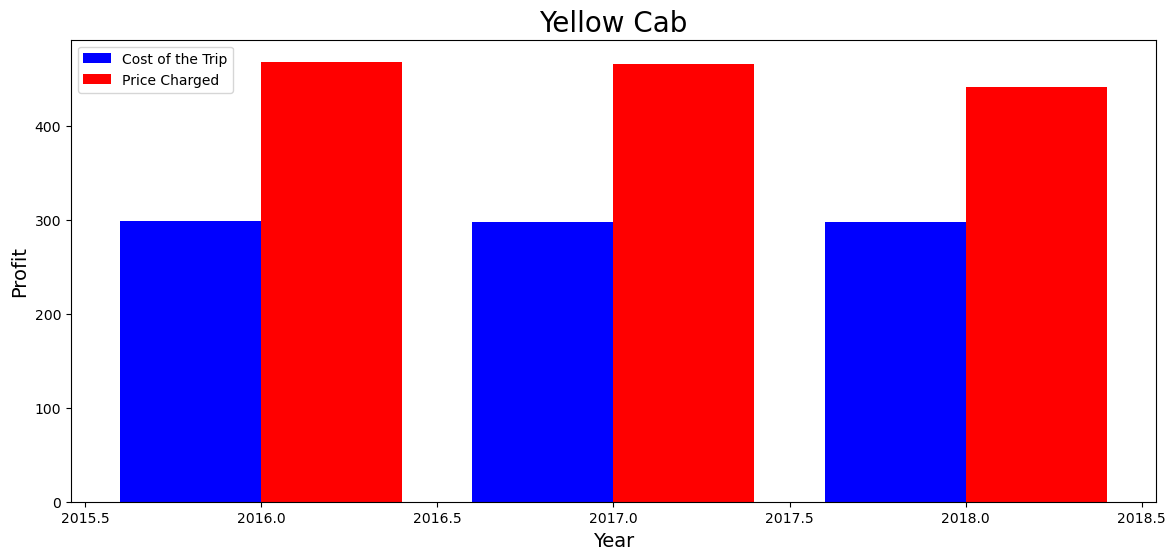

In [36]:
plot1 = Cab_Data[Cab_Data.Company=='Yellow Cab'].groupby('Year').Transaction_ID.count()
plot3 = Cab_Data[Cab_Data.Company=='Yellow Cab'].groupby('Year').Price_Charged.mean()
plot4 = Cab_Data[Cab_Data.Company=='Yellow Cab'].groupby('Year').Cost_of_Trip.mean()
plt.figure(figsize=(14,6))
ax = plt.subplot(111)
ax.bar(plot1.index-0.2, plot4.values, width=0.4, color='blue', align='center',label='Cost of the Trip')
ax.bar(plot1.index+0.2, plot3.values, width=0.4, color='red', align='center',label='Price Charged')
plt.ylabel('Profit', fontsize=14)
plt.xlabel('Year', fontsize=14)
plt.title('Yellow Cab', fontsize=20)
plt.legend()
plt.show()

>* On average yellow cab seems to have a higher profit**

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=Cab_Data, x=PinkCab["KM_Travelled"], y=PinkCab['Cost_of_Trip'], hue="City")
plt.title('Pink Cab KM Travelled',fontsize = 20)
plt.ylabel('Pink Cab Cost of trip',fontsize = 16)
plt.xlabel('Pink Cab KM Travelled',fontsize = 16)
plt.show()

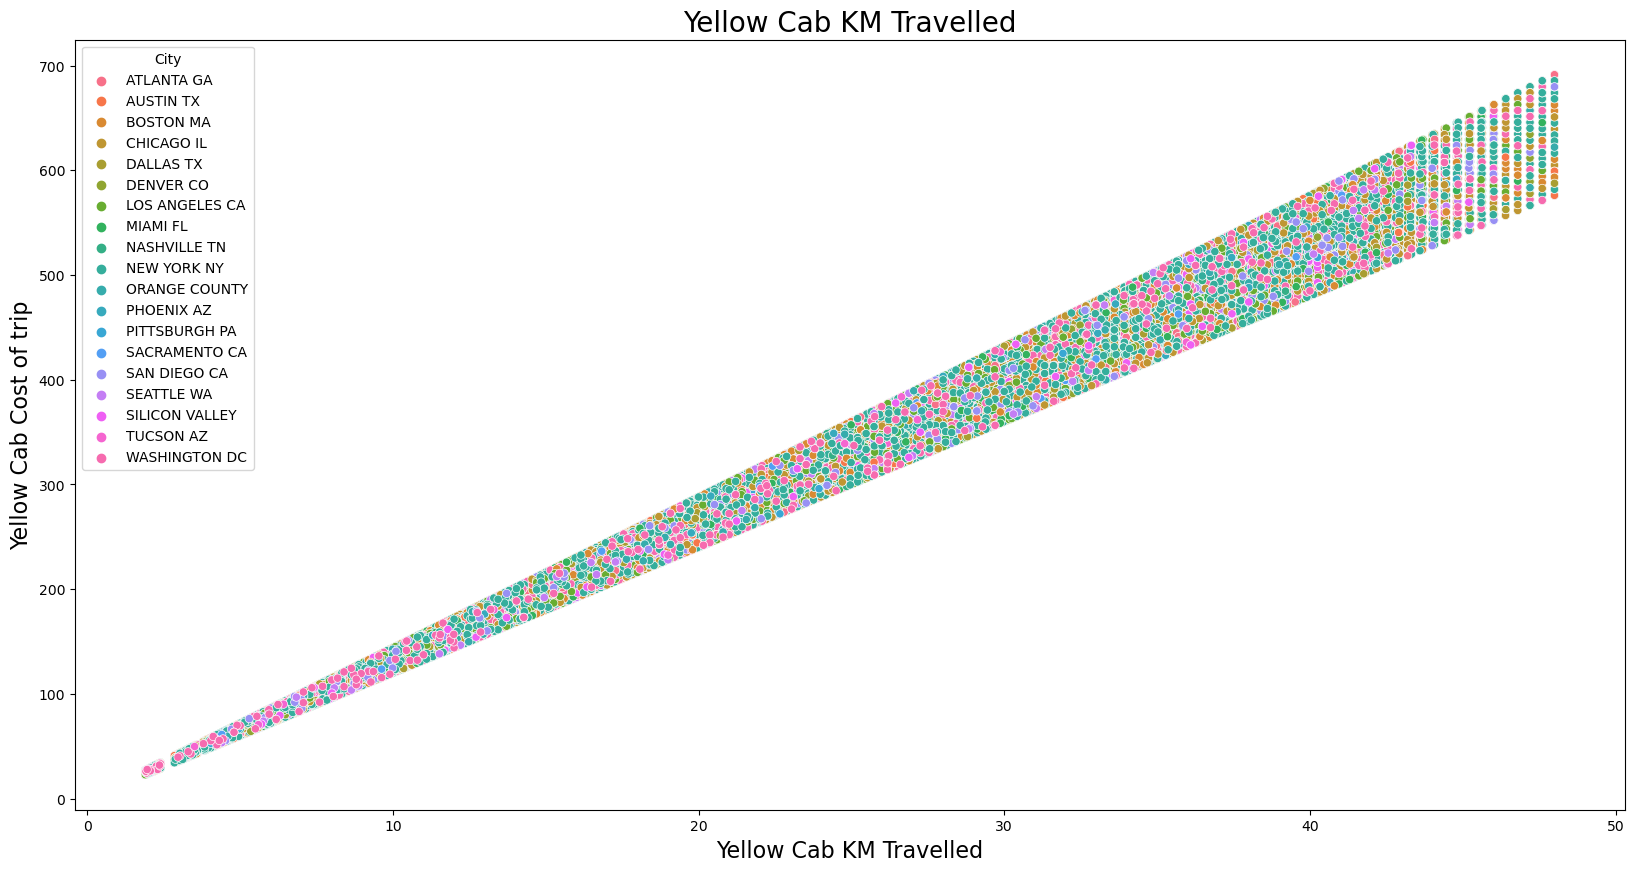

In [37]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=Cab_Data, x=YellowCab["KM_Travelled"], y=YellowCab['Cost_of_Trip'], hue="City")
plt.title('Yellow Cab KM Travelled',fontsize = 20)
plt.ylabel('Yellow Cab Cost of trip',fontsize = 16)
plt.xlabel('Yellow Cab KM Travelled',fontsize = 16)
plt.show()

> **Pink Cab has Almost same riding price
Yellow Cab has higher price in more developed city.**

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=Cab_Data, x=PinkCab["KM_Travelled"], y=PinkCab['Price_Charged'], hue="City")
plt.title('Pink Cab KM Travelled',fontsize = 20)
plt.ylabel('Pink Cab Price Charged',fontsize = 14)
plt.xlabel('Pink Cab KM Travelled',fontsize = 14)
plt.show()

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=Cab_Data, x=YellowCab["KM_Travelled"], y=YellowCab['Price_Charged'], hue="City")
plt.title('Yellow Cab KM Travelled',fontsize = 20)
plt.ylabel('Yellow Cab Price Charged',fontsize = 14)
plt.xlabel('Yellow Cab KM Travelled',fontsize = 14)
plt.show()

> *  Yellow Cab price charged is more in comparison to the other cities, especially NY. 
> * As distance increase, pink cab increase the same for all
> * the outliers exist in both the graphs  which may be due to high end cars or weather.

## Creating Master Data

In [ ]:
left = Cab_Data.set_index(['Transaction_ID'])
right = Transaction_ID.set_index(['Transaction_ID'])
data = left.join(right)
data.head()

In [ ]:
left = data.set_index([data.index,'Customer_ID'])
right = Customer_ID.set_index(['Customer_ID'])
data = left.join(right)
data.head()

In [ ]:
left = data.set_index([data.index,'City'])
right = City.set_index(['City'])
data = left.join(right)
data.head()

In [ ]:
data.info()

In [ ]:
data = data.reset_index()
data = data.rename(columns={'Income_(USD/Month)':'Income'})
city_users = data.groupby('City').Users.count()
city_users

In [ ]:
city_y = data[data.Company=='Yellow Cab'].groupby('City').Transaction_ID.count()
city_y

In [ ]:
labs = city_users.index
vals = city_users.values
figp, axp = plt.subplots(figsize=(18,13))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')
plt.title('Users per City')
plt.show()

> **New York City has the highest Cab users with 28% followed by Chicago with 16% and Los Angeles with 13%**

In [ ]:
labs = city_y.index
vals = city_y.values
figp, axp = plt.subplots(figsize=(17,10))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Transaction per City for Yellow Cab')
plt.show()

In [ ]:
city_p = data[data.Company=='Pink Cab'].groupby('City').Transaction_ID.count()
city_p

In [ ]:
labs = city_p.index
vals = city_p.values
figp, axp = plt.subplots(figsize=(20,10))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Transaction per City for Pink Cab')
plt.show()

>**Transaction for Yellow Cab is highest in New York City which has the highest Cab Users of 28%**

>**Transaction for Pink Cab is highest in Los Angeles City**

In [ ]:
gender_y=data[data.Company=='Yellow Cab'].groupby('Gender').Price_Charged.mean()
gender_y

In [ ]:
labs = gender_y.index
vals = gender_y.values
figp, axp = plt.subplots(figsize=(10,7))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Price Charged per Gender for Yellow Cab')
plt.show()

In [ ]:
gender_p=data[data.Company=='Pink Cab'].groupby('Gender').Price_Charged.mean()
gender_p

>**Yellow Cab charge less from Female Customers whereas Pink Cab charges same for both Male and Female Customers.**

In [ ]:
gender_cab=data.groupby(['Company','Gender']).Customer_ID.nunique()
gender_cab

In [ ]:
labs = gender_cab.index
vals = gender_cab.values
figp, axp = plt.subplots(figsize=(10,7))
axp.pie(vals , labels=labs, autopct='%1.1f%%',shadow=True, startangle=90,)
axp.axis('equal')

plt.title('Customer share per gender per cab')
plt.show()

>**Female Customers in Yellow Cab is higher compared to Male customers**

In [ ]:
data['Margins'] = (data['Price_Charged']-data['Cost_of_Trip'])
data.head()

In [ ]:
data.tail()

In [ ]:
df = data[['KM_Travelled','Price_Charged','Cost_of_Trip','Month','Year','Age','Income','Margins']]
df.corr()

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,cmap='coolwarm')
plt.show()

>**There is a correlation between Margin & Price_Charged**

In [ ]:
city_m = data[data.Month==12].groupby('City').Margins.mean()
city_m

In [ ]:
dt1 = data[(data.Company=='Pink Cab')&(data.City=='NEW YORK NY')].groupby(['Year','Month']).Margins.mean()
dt2 = data[(data.Company=='Yellow Cab')&(data.City=='NEW YORK NY')].groupby(['Year','Month']).Margins.mean()
dd1 = pd.DataFrame({'Margins_pink':dt1.values,'Transactions_pink':data[data.Company=='Pink Cab'].groupby(['Year','Month']).Transaction_ID.count().values})
dd2 = pd.DataFrame({'Margins_yellow':dt2.values,'Transactions_yellow':data[data.Company=='Yellow Cab'].groupby(['Year','Month']).Transaction_ID.count().values})

### **Monthly Margins of Pink Cab**

In [ ]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=dd1.Transactions_pink,y=dd1.Margins_pink)
plt.show()

> Pink Cabs increase their margins with increase in number of Transactions

### Margins for Yellow cabs

In [ ]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=dd2.Transactions_yellow,y=dd2.Margins_yellow)
plt.show()

>Yellow Cab decrease the Margin with the increase in Transaction

# Hypothesis Testing

### Null Hypothesis:Margin remain the same regarding Gender for both Yellow Cab & Pink Cab

In [ ]:
Y = data[(data.Gender=='Female')&(data.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()
P = data[(data.Gender=='Male')&(data.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()
print(Y.shape[0],P.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(Y.values,P=P.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that there is a statistical difference')
else:
    print('We accept null hypothesis that there is no statistical difference')
    
print('P value is ', p_value)

>**Yellow Cab:** There is difference in Margin between Male and Female customers


**For Pink Cabs**

In [ ]:
a = data[(data.Gender=='Female')&(data.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()
b = data[(data.Gender=='Male')&(data.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that there is a difference')
else:
    print('We accept null hypothesis that there is no difference')
    
print('P value is ', p_value)

>**Pink Cab:** There is no difference in Margin between Male and Female customers

In [ ]:
#Margins per Age
data[data.Age<=50].groupby('Company').Margins.mean()
data[data.Age>50].groupby('Company').Margins.mean()

In [ ]:
#Pink Cab
a = data[(data.Age<=50)&(data.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()
b = data[(data.Age>50)&(data.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that theres a difference')
else:
    print('We accept null hypothesis that theres no difference')
    
print('P value is ', p_value)

In [ ]:

#Yellow Cab
a = data[(data.Age<=50)&(data.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()
b = data[(data.Age>50)&(data.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()
print(a.shape[0],b.shape[0])

from scipy import stats
_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that theres a difference')
else:
    print('We accept null hypothesis')
    
print('P value is ', p_value)

>**Yellow Cabs also gives discount to people older than 50**

>**Is there difference in margins for Card payer and Cash payers**

In [ ]:
#Pink Cab
a = data[(data.Payment_Mode=='Cash')&(data.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()
b = data[(data.Payment_Mode=='Card')&(data.Company=='Pink Cab')].groupby('Transaction_ID').Margins.mean()


_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that theres a difference')
else:
    print('We accept null hypothesis that theres no difference')
    
print('P value is ', p_value)

In [ ]:
#Yellow Cab
a = data[(data.Payment_Mode=='Cash')&(data.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()
b = data[(data.Payment_Mode=='Card')&(data.Company=='Yellow Cab')].groupby('Transaction_ID').Margins.mean()


_, p_value = stats.ttest_ind(a.values,b=b.values,equal_var=True)
if(p_value<0.05):
    print('We accept alternate hypothesis that there is a statistical difference')
else:
    print('We accept null hypothesis that there is no statistical difference')
    
print('P value is ', p_value)

>**There is no difference in Margin regarding mode of Payment for both Yellow & Pink Cab**

In [ ]:
data.head()

In [ ]:
data.to_csv('master_data.csv',index = False)